### Hybrid approach combining Self Organizing Maps and ANN 

### Part - 1 (Identify the Frauds with the Self-Organizing Map)

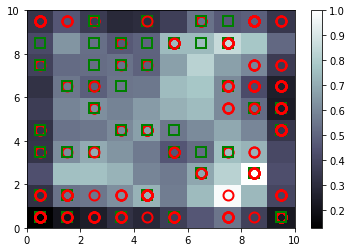

In [3]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv("D:\\ML-Datasets\\Udemy-DeepLearning\\Credit_Card_Applications.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

# Training the SOM
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=X.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, j in enumerate(X):
    w = som.winner(j)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]], markeredgecolor=colors[y[i]], 
        markerfacecolor = 'None', markersize=10, markeredgewidth=2)
show()

In [45]:
# finding the frauds

mappings = som.win_map(X)
frauds = np.concatenate((mappings[(7, 1)], mappings[(8, 2)], mappings[(7, 8)]), axis=0)
frauds = sc.inverse_transform(frauds)

### Part 2 - Going from Unsupervised to Supervised Deep Learning

In [46]:
# Creating the matrix of features

customers = dataset.iloc[:, 1:].values

In [47]:
# creating the dependent variable
# We will extract all the customerids from the frauds list - because they are the customers who potentially cheated

# We will initialize a vector of 690 zeros and for all the customers who are in the fraud list, we will mark them as 1
is_fraud = np.zeros(len(dataset))

for index in range(len(dataset)):
    if dataset.iloc[index, 0] in frauds:  # ith line and 0 is the index of the customerid column
        is_fraud[index] = 1
    

In [49]:
# feature scaling for ANN

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [52]:
# Build the ANN

# Importing Keras libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initializing the ANN
classifier = Sequential()

# Adding the input layer 
classifier.add(Dense(activation='relu', input_dim=15, units=4, kernel_initializer='uniform'))

# Adding the output layer
classifier.add(Dense(activation='sigmoid', kernel_initializer='uniform', units=1))

# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fitting the ANN to the dataset (because the dataset is so small)
classifier.fit(customers, is_fraud, batch_size=1, epochs=5)

Train on 690 samples
Epoch 1/5
690/690 [==============================] - 4s 5ms/sample - loss: 0.4450 - accuracy: 0.9464
Epoch 2/5
690/690 [==============================] - 1s 2ms/sample - loss: 0.1569 - accuracy: 0.9507
Epoch 3/5
690/690 [==============================] - 1s 2ms/sample - loss: 0.1127 - accuracy: 0.9507
Epoch 4/5
690/690 [==============================] - 1s 2ms/sample - loss: 0.0930 - accuracy: 0.9507
Epoch 5/5
690/690 [==============================] - 1s 2ms/sample - loss: 0.0799 - accuracy: 0.9507


In [54]:
# Making predictions for probabilities of frauds

y_pred = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)

In [57]:
# Now we will sort the customers based on their predicted probabilities of cheating
y_pred = y_pred[y_pred[:, 1].argsort()]
y_pred = pd.DataFrame(y_pred)

y_pred.head()

,0,1
0,15667460.0,0.000012
1,15723827.0,0.000012
2,15799785.0,0.000017
3,15621423.0,0.000028
4,15731989.0,0.000032
